In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.metrics import *
import cv2

%matplotlib inline

In [ ]:
def calc_mse(img1, img2, axis=2):
    img1 = img1.astype(np.float64)  # convert to float64 to avoid overflow
    img2 = img2.astype(np.float64)  # convert to float64 to avoid overflow

    if axis == 2:
        mse_image = np.linalg.norm(img1 - img2, axis=axis) ** 2
        num_channels = img1.shape[axis]
        mse = np.mean(mse_image) / num_channels
    elif axis == 0:
        mse_image = (img1 - img2) ** 2
        mse = np.mean(mse_image)
    else:
        raise ValueError("axis must be 0 or 2")
    return mse, mse_image


def calc_mse_skimage(img1, img2):
    return mean_squared_error(img1, img2)


def calc_ssim(img1, img2, axis=2):
    mean_ssim, grad, ssim_image = structural_similarity(
        img1, img2, channel_axis=axis, gradient=True, full=True
    )
    return mean_ssim, grad, ssim_image

In [ ]:
ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"160906_pizza1_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"170915_toddler4_{ground}",
]

In [ ]:
gt_dir = "/datassd/KinectStream/panoptic_data"
pred_dir = "/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study"
logID = 1
cqp = 0
dqp = 0
exp_name = f"o3d_nvenc_cqp{cqp}_d_yuvqp{dqp}_fps30_s_nocull_c_nocull"
frame_id = 500

In [ ]:
gt_image_view0_path = os.path.join(
    gt_dir, seq_names[0], "color", f"{frame_id}_color_0.png"
)
pred_image_view0_path = os.path.join(
    pred_dir, seq_names[0], exp_name, f"log{logID}", f"{frame_id}_color_bgra_0.png"
)

gt_image_view0 = cv2.imread(gt_image_view0_path)
pred_image_view0 = cv2.imread(pred_image_view0_path)

# gt_image_view0_path = os.path.join(gt_dir, seq_names[0], 'depth', f'{frame_id}_depth_0.png')
# pred_image_view0_path = os.path.join(pred_dir, seq_names[0], exp_name, f'log{logID}', f'{frame_id}_depth_yuv16_0.png')

# gt_image_view0 = cv2.imread(gt_image_view0_path, cv2.IMREAD_ANYDEPTH)
# pred_image_view0 = cv2.imread(pred_image_view0_path, cv2.IMREAD_ANYDEPTH)

gt_image_view0.shape, pred_image_view0.shape

((512, 592, 3), (512, 592, 3))

In [ ]:
def plot_images(img1, img2, type="color"):
    if type == "color":
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1)
    ax[0].set_title("GT")
    ax[1].imshow(img2)
    ax[1].set_title("Pred")
    ax[0].axis("off")
    ax[1].axis("off")
    plt.show()


def plot_image(img, channel_shuffle=True):
    if len(img.shape) == 3 and channel_shuffle:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

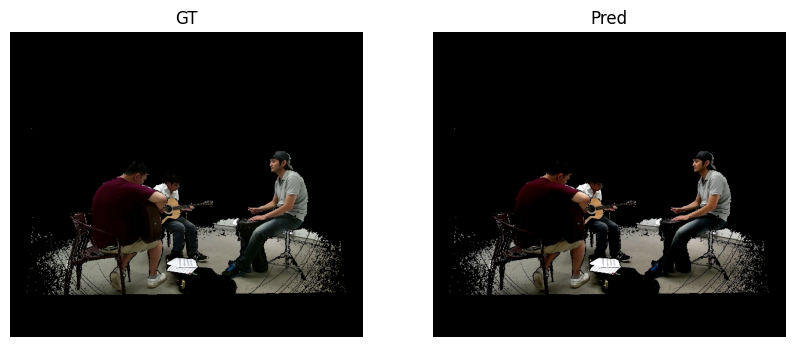

In [9]:
# plot_images(gt_image_view0, pred_image_view0)
plot_images(gt_image_view0, pred_image_view0)

MSE Color: 14.150452210022522
MSE Color shape: (512, 592)


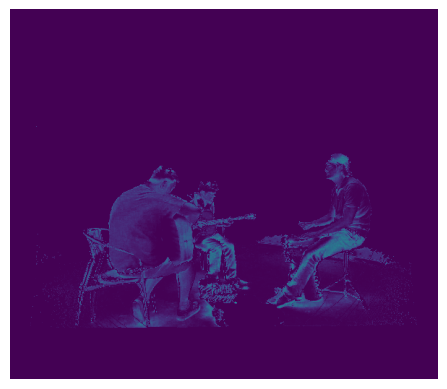

MSE Gray: 12.7928466796875
MSE Gray shape: (512, 592)


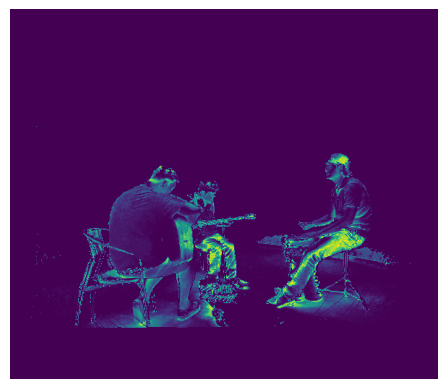

In [ ]:
# MSE my implementation
mse, mse_image = calc_mse(gt_image_view0, pred_image_view0)
print(f"MSE Color: {mse}")
print(f"MSE Color shape: {mse_image.shape}")
plot_image(mse_image)

# MSE gray scale
gt_image_view0_gray = cv2.cvtColor(gt_image_view0, cv2.COLOR_BGR2GRAY)
pred_image_view0_gray = cv2.cvtColor(pred_image_view0, cv2.COLOR_BGR2GRAY)
mse_gray, mse_image_gray = calc_mse(gt_image_view0_gray, pred_image_view0_gray, axis=0)
print(f"MSE Gray: {mse_gray}")
print(f"MSE Gray shape: {mse_image_gray.shape}")
plot_image(mse_image_gray, channel_shuffle=False)

In [ ]:
# MSE skimage implementation
mse = calc_mse_skimage(gt_image_view0, pred_image_view0)
print(f"MSE Color: {mse}")

# MSE skimage gray scale
mse_gray = calc_mse_skimage(gt_image_view0_gray, pred_image_view0_gray)
print(f"MSE Gray: {mse_gray}")

MSE Color: 14.150452210022523
MSE Gray: 12.7928466796875


SSIM: 0.9685494312768358
SSIM shape: (512, 592, 3)


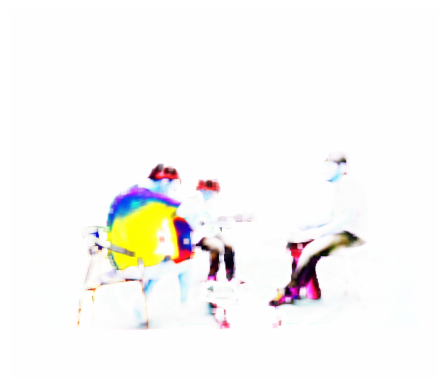

In [ ]:
# SSIM skimage implementation
ssim, grad, ssim_image = calc_ssim(gt_image_view0, pred_image_view0)
print(f"SSIM: {ssim}")
print(f"SSIM shape: {ssim_image.shape}")
ssim_image_normalized = (ssim_image - np.min(ssim_image)) / (
    np.max(ssim_image) - np.min(ssim_image)
)
plot_image(ssim_image_normalized, channel_shuffle=False)

In [ ]:
ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]
logIDs = [1, 0, 2, 1, 0]
frame_id_ranges = [(2, 5517), (34, 10000), (19, 5600), (1, 1413), (1, 3800)]


gt_dir = "/datassd/KinectStream/panoptic_data"
pred_dir = "/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study"

cqps = list(range(0, 51, 10))
dqps = list(range(0, 31, 5))

In [ ]:
metric_dict = {}
for seq_name in seq_names:
    seq_idx = seq_names.index(seq_name)
    logID = logIDs[seq_idx]
    frame_id_range = frame_id_ranges[seq_idx]
    dqp = 0
    mse_per_seq = []
    ssim_per_seq = []
    for cqp in cqps:
        exp_name = f"o3d_nvenc_cqp{cqp}_d_yuvqp{dqp}_fps30_s_nocull_c_nocull"
        mse_list = []
        ssim_list = []
        for frame_id in range(0, frame_id_range[1], 100):
            gt_image_view0_path = os.path.join(
                gt_dir, seq_name, "color", f"{frame_id}_color_0.png"
            )
            pred_image_view0_path = os.path.join(
                pred_dir,
                seq_name,
                exp_name,
                f"log{logID}",
                f"{frame_id}_color_bgra_0.png",
            )

            if not os.path.exists(gt_image_view0_path):
                print(f"{gt_image_view0_path} not found. Skipping frame {frame_id}")
                continue
            if not os.path.exists(pred_image_view0_path):
                print(f"{pred_image_view0_path} not found. Skipping frame {frame_id}")
                continue

            gt_image_view0 = cv2.imread(gt_image_view0_path)
            pred_image_view0 = cv2.imread(pred_image_view0_path)

            mse, mse_image = calc_mse(gt_image_view0, pred_image_view0)
            rmse = np.sqrt(mse)
            ssim, grad, ssim_image = calc_ssim(gt_image_view0, pred_image_view0)

            # mse_image_normalized = (mse_image - np.min(mse_image)) / (np.max(mse_image) - np.min(mse_image)) # Normalize MSE image between 0 and 1 for visualization
            # ssim_image_normalized = (ssim_image - np.min(ssim_image)) / (np.max(ssim_image) - np.min(ssim_image)) # Normalize SSIM image between 0 and 1 for visualization

            # print(f'{seq_name} - Frame {frame_id}, MSE: {mse}, SSIM: {ssim}')
            # plot_images(gt_image_view0, pred_image_view0)
            # plot_image(mse_image_normalized)
            # plot_image(ssim_image_normalized, channel_shuffle=False)

            # gt_image_view0_gray = cv2.cvtColor(gt_image_view0, cv2.COLOR_BGR2GRAY)
            # pred_image_view0_gray = cv2.cvtColor(pred_image_view0, cv2.COLOR_BGR2GRAY)
            # mse_gray, mse_image_gray = calc_mse(gt_image_view0_gray, pred_image_view0_gray, axis=0)
            # print(f'{seq_name} - Frame {frame_id}, MSE Gray: {mse_gray}')
            # plot_image(mse_image_gray, channel_shuffle=False)
            mse_list.append(mse)
            ssim_list.append(ssim)
        print(
            f"{seq_name} - CQP: {cqp}, Mean MSE: {np.mean(mse_list)}, Mean SSIM: {np.mean(ssim_list)}"
        )
        mse_per_seq.append(np.mean(mse_list))
        ssim_per_seq.append(np.mean(ssim_list))

    metric_dict[seq_name] = {"cqp": cqps, "mse": mse_per_seq, "ssim": ssim_per_seq}

/datassd/KinectStream/panoptic_data/160906_band2_with_ground/color/0_color_0.png not found. Skipping frame 0
/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study/160906_band2_with_ground/o3d_nvenc_cqp0_d_yuvqp0_fps30_s_nocull_c_nocull/log1/100_color_bgra_0.png not found. Skipping frame 100
160906_band2_with_ground - CQP: 0, Mean MSE: 13.955147347054085, Mean SSIM: 0.9692993629325921
/datassd/KinectStream/panoptic_data/160906_band2_with_ground/color/0_color_0.png not found. Skipping frame 0
160906_band2_with_ground - CQP: 10, Mean MSE: 14.119694850212431, Mean SSIM: 0.9687752135976094
/datassd/KinectStream/panoptic_data/160906_band2_with_ground/color/0_color_0.png not found. Skipping frame 0
/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study/160906_band2_with_ground/o3d_nvenc_cqp20_d_yuvqp0_fps30_s_nocull_c_nocull/log1/100_color_bgra_0.png not found. Skipping frame 100
160906_band2_with_ground - CQP: 20, Mean MSE: 15.319747828068955, Mean SSIM: 0.9669344549727541
/datassd/Ki

In [15]:
metric_dict

{'160906_band2_with_ground': {'cqp': [0, 10, 20, 30, 40, 50],
  'mse': [13.955147347054085,
   14.119694850212431,
   15.319747828068955,
   20.411947974252666,
   54.4184312079006,
   258.74091061347997],
  'ssim': [0.9692993629325921,
   0.9687752135976094,
   0.9669344549727541,
   0.9617910888726354,
   0.9418082029567758,
   0.8536238289369098]},
 '170307_dance5_with_ground': {'cqp': [0, 10, 20, 30, 40, 50],
  'mse': [3.8159856411809536,
   3.648916994498049,
   4.36009709785519,
   7.9394987583464145,
   31.850238621967133,
   225.54099871930757],
  'ssim': [0.9973232186014517,
   0.9964861164118203,
   0.9940553229688026,
   0.9860768340711701,
   0.9657918534061911,
   0.8819723946644248]},
 '170915_office1_with_ground': {'cqp': [0, 10, 20, 30, 40, 50],
  'mse': [8.131552186508241,
   8.328716187704632,
   9.121396396396396,
   13.668823382153459,
   47.30779962313165,
   278.9329367793405],
  'ssim': [0.9852826862369254,
   0.9843213938675743,
   0.9826885472396374,
   0.97793

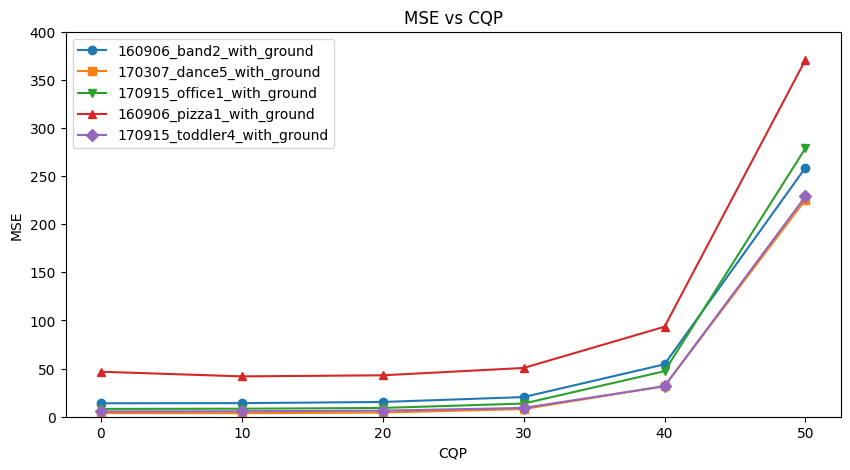

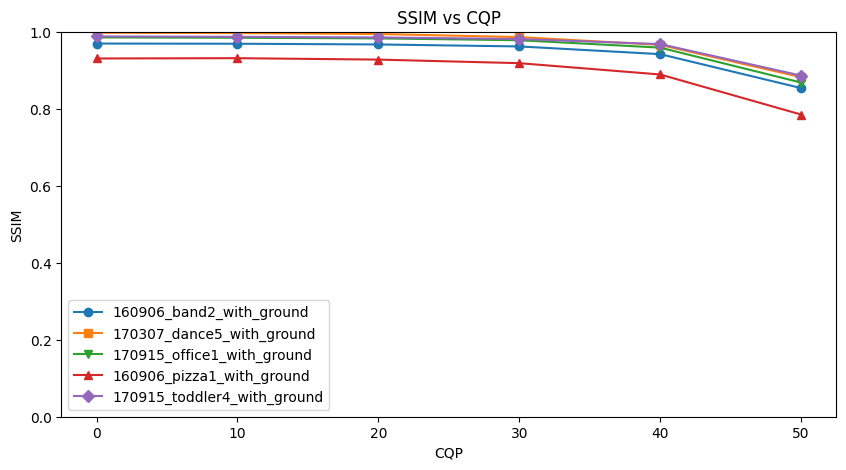

In [ ]:
# Plot mse per cqp for all sequences.

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]

metric = "mse"
markers = markers[: len(seq_names)]
for seq_name in seq_names:
    seq_idx = seq_names.index(seq_name)
    ax.plot(
        metric_dict[seq_name]["cqp"],
        metric_dict[seq_name][metric],
        label=seq_name,
        marker=markers[seq_idx],
    )
ax.set_xlabel("CQP")
ax.set_ylabel("MSE")
ax.set_ylim([0, 400])
ax.legend()
plt.title("MSE vs CQP")
plt.show()

# Plot ssim per cqp for all sequences.
metric = "ssim"
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for seq_name in seq_names:
    seq_idx = seq_names.index(seq_name)
    ax.plot(
        metric_dict[seq_name]["cqp"],
        metric_dict[seq_name][metric],
        label=seq_name,
        marker=markers[seq_idx],
    )
ax.set_xlabel("CQP")
ax.set_ylabel("SSIM")
ax.set_ylim([0, 1])
ax.legend()
plt.title("SSIM vs CQP")
plt.show()

In [ ]:
metric_dict = {}
for seq_name in seq_names:
    seq_idx = seq_names.index(seq_name)
    logID = logIDs[seq_idx]
    frame_id_range = frame_id_ranges[seq_idx]
    cqp = 0
    mse_per_seq = []
    rmse_per_seq = []
    ssim_per_seq = []
    for dqp in dqps:
        exp_name = f"o3d_nvenc_cqp{cqp}_d_yuvqp{dqp}_fps30_s_nocull_c_nocull"
        mse_list = []
        rmse_list = []
        ssim_list = []
        for frame_id in range(0, frame_id_range[1], 100):
            gt_image_view0_path = os.path.join(
                gt_dir, seq_name, "depth", f"{frame_id}_depth_0.png"
            )
            pred_image_view0_path = os.path.join(
                pred_dir,
                seq_name,
                exp_name,
                f"log{logID}",
                f"{frame_id}_depth_yuv16_0.png",
            )

            if not os.path.exists(gt_image_view0_path):
                print(f"{gt_image_view0_path} not found. Skipping frame {frame_id}")
                continue
            if not os.path.exists(pred_image_view0_path):
                print(f"{pred_image_view0_path} not found. Skipping frame {frame_id}")
                continue

            gt_image_view0 = cv2.imread(gt_image_view0_path, cv2.IMREAD_ANYDEPTH)
            pred_image_view0 = cv2.imread(pred_image_view0_path, cv2.IMREAD_ANYDEPTH)

            mse, mse_image = calc_mse(gt_image_view0, pred_image_view0, axis=0)
            ssim, grad, ssim_image = calc_ssim(gt_image_view0, pred_image_view0, axis=0)
            rmse = np.sqrt(mse)

            mse_image_normalized = (mse_image - np.min(mse_image)) / (
                np.max(mse_image) - np.min(mse_image)
            )  # Normalize MSE image between 0 and 1 for visualization
            ssim_image_normalized = (ssim_image - np.min(ssim_image)) / (
                np.max(ssim_image) - np.min(ssim_image)
            )

            # print(f'{seq_name} - Frame {frame_id}, MSE: {mse}, RMSE: {rmse}, SSIM: {ssim}')
            # plot_images(gt_image_view0, pred_image_view0, type='gray')
            # plot_image(mse_image_normalized, channel_shuffle=False)

            mse_list.append(mse)
            rmse_list.append(rmse)
            ssim_list.append(ssim)
        print(
            f"{seq_name} - DQP: {dqp}, Mean MSE: {np.mean(mse_list)}, Mean RMSE: {np.mean(rmse_list)}, Mean SSIM: {np.mean(ssim_list)}"
        )
        mse_per_seq.append(np.mean(mse_list))
        rmse_per_seq.append(np.mean(rmse_list))
        ssim_per_seq.append(np.mean(ssim_list))

    metric_dict[seq_name] = {
        "dqp": dqps,
        "mse": mse_per_seq,
        "rmse": rmse_per_seq,
        "ssim": ssim_per_seq,
    }

/datassd/KinectStream/panoptic_data/160906_band2_with_ground/depth/0_depth_0.png not found. Skipping frame 0
/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study/160906_band2_with_ground/o3d_nvenc_cqp0_d_yuvqp0_fps30_s_nocull_c_nocull/log1/100_depth_yuv16_0.png not found. Skipping frame 100


/home/lei/.local/lib/python3.8/site-packages/skimage/metrics/_structural_similarity.py:133: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ch_result = structural_similarity(im1[_at(ch)],


160906_band2_with_ground - DQP: 0, Mean MSE: 13.574251986361363, Mean RMSE: 3.684187779548629, Mean SSIM: 0.9999972127504152
/datassd/KinectStream/panoptic_data/160906_band2_with_ground/depth/0_depth_0.png not found. Skipping frame 0
/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study/160906_band2_with_ground/o3d_nvenc_cqp0_d_yuvqp5_fps30_s_nocull_c_nocull/log1/100_depth_yuv16_0.png not found. Skipping frame 100
160906_band2_with_ground - DQP: 5, Mean MSE: 28.389431240322356, Mean RMSE: 5.328051716267401, Mean SSIM: 0.9999938985039539
/datassd/KinectStream/panoptic_data/160906_band2_with_ground/depth/0_depth_0.png not found. Skipping frame 0
/datassd/pipeline_cpp/client_tiled/ablation/bitrate_study/160906_band2_with_ground/o3d_nvenc_cqp0_d_yuvqp10_fps30_s_nocull_c_nocull/log1/100_depth_yuv16_0.png not found. Skipping frame 100
160906_band2_with_ground - DQP: 10, Mean MSE: 66.09371945187375, Mean RMSE: 8.12963102433326, Mean SSIM: 0.9999849647774354
/datassd/KinectStream/panoptic_

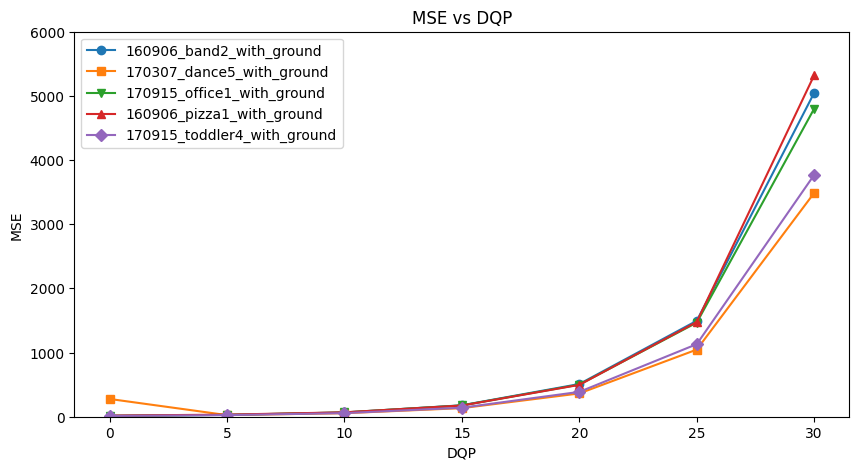

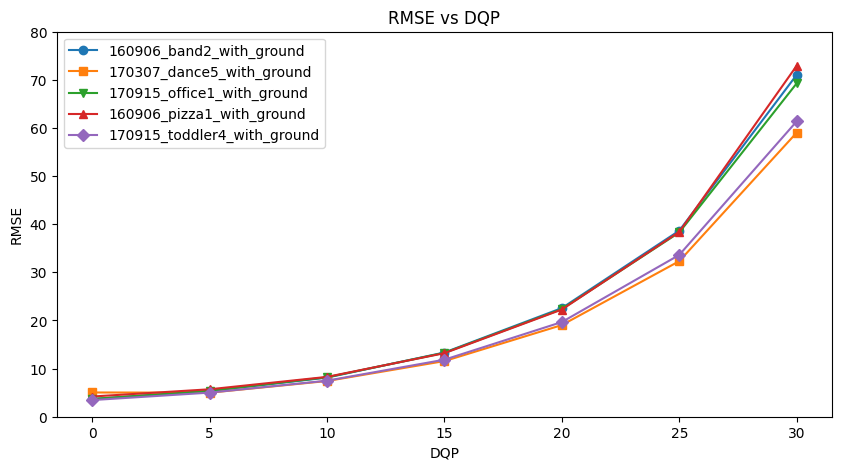

In [ ]:
# Plot mse per cqp for all sequences.

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]

metric = "mse"
markers = markers[: len(seq_names)]
for seq_name in seq_names:
    seq_idx = seq_names.index(seq_name)
    ax.plot(
        metric_dict[seq_name]["dqp"],
        metric_dict[seq_name][metric],
        label=seq_name,
        marker=markers[seq_idx],
    )
ax.set_xlabel("DQP")
ax.set_ylabel("MSE")
ax.set_ylim([0, 6000])
ax.legend()
plt.title("MSE vs DQP")
plt.show()

# Plot rmse per cqp for all sequences.

metric = "rmse"
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for seq_name in seq_names:
    seq_idx = seq_names.index(seq_name)
    ax.plot(
        metric_dict[seq_name]["dqp"],
        metric_dict[seq_name][metric],
        label=seq_name,
        marker=markers[seq_idx],
    )
ax.set_xlabel("DQP")
ax.set_ylabel("RMSE")
ax.set_ylim([0, 80])
ax.legend()
plt.title("RMSE vs DQP")
plt.show()